## CMPINF 2100 Fall 2021 - Week 06

### reshaping long vs wide format

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Air quality data set

Read in the data from the Github link.

In [2]:
air_url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_long.csv'

In [10]:
air = pd.read_csv(air_url, index_col='date.utc', parse_dates=True)

In [11]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5272 entries, 2019-06-18 06:00:00+00:00 to 2019-04-09 02:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       5272 non-null   object 
 1   country    5272 non-null   object 
 2   location   5272 non-null   object 
 3   parameter  5272 non-null   object 
 4   value      5272 non-null   float64
 5   unit       5272 non-null   object 
dtypes: float64(1), object(5)
memory usage: 288.3+ KB


In [12]:
air

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [13]:
air.index

DatetimeIndex(['2019-06-18 06:00:00+00:00', '2019-06-17 08:00:00+00:00',
               '2019-06-17 07:00:00+00:00', '2019-06-17 06:00:00+00:00',
               '2019-06-17 05:00:00+00:00', '2019-06-17 04:00:00+00:00',
               '2019-06-17 03:00:00+00:00', '2019-06-17 02:00:00+00:00',
               '2019-06-17 01:00:00+00:00', '2019-06-16 01:00:00+00:00',
               ...
               '2019-04-09 11:00:00+00:00', '2019-04-09 10:00:00+00:00',
               '2019-04-09 09:00:00+00:00', '2019-04-09 08:00:00+00:00',
               '2019-04-09 07:00:00+00:00', '2019-04-09 06:00:00+00:00',
               '2019-04-09 05:00:00+00:00', '2019-04-09 04:00:00+00:00',
               '2019-04-09 03:00:00+00:00', '2019-04-09 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date.utc', length=5272, freq=None)

Explore the data.

In [14]:
air.describe()

,value
count,5272.000000
mean,24.222743
std,15.592773
min,0.000000
25%,11.000000
50%,22.000000
75%,33.000000
max,117.200000


In [16]:
air.describe(include = [object])

,city,country,location,parameter,unit
count,5272,5272,5272,5272,5272
unique,3,3,3,2,1
top,London,GB,London Westminster,no2,µg/m³
freq,3256,3256,3256,3447,5272


In [17]:
air.parameter.nunique()

2

In [18]:
air.parameter.value_counts()

no2     3447
pm25    1825
Name: parameter, dtype: int64

In [19]:
air.nunique()

city           3
country        3
location       3
parameter      2
value        571
unit           1
dtype: int64

In [21]:
air.isna().sum()

city         0
country      0
location     0
parameter    0
value        0
unit         0
dtype: int64

In [22]:
air.parameter.value_counts()

no2     3447
pm25    1825
Name: parameter, dtype: int64

Focus just on the `parameter == 'no2'`.

In [23]:
no2 = air.loc[ air.parameter == 'no2' ].copy()

In [24]:
no2

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [25]:
no2.pivot( columns='location', values='value' )

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,54.5,34.2,67.0
2019-04-09 04:00:00+00:00,34.5,48.5,41.0
2019-04-09 05:00:00+00:00,46.5,59.5,41.0
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


Look at the 0th row of the pivoted dataframe:

In [26]:
no2.pivot( columns='location', values='value' ).iloc[0]

location
BETR801               22.5
FR04014               24.4
London Westminster     NaN
Name: 2019-04-09 01:00:00+00:00, dtype: float64

Look at the corresponding inded value in the `no2` dataframe.

In [27]:
no2.loc[ '2019-04-09 01:00:00+00:00' ]

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³


In [28]:
no2.location.value_counts()

FR04014               1676
London Westminster    1608
BETR801                163
Name: location, dtype: int64

What if we want the new columns to be based on more than one column?

In [29]:
no2.pivot( columns=['country', 'city', 'location'], values='value' )

country,FR,BE,GB
city,Paris,Antwerpen,London
location,FR04014,BETR801,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,24.4,22.5,NaN
2019-04-09 02:00:00+00:00,27.4,53.5,67.0
2019-04-09 03:00:00+00:00,34.2,54.5,67.0
2019-04-09 04:00:00+00:00,48.5,34.5,41.0
2019-04-09 05:00:00+00:00,59.5,46.5,41.0
...,...,...,...
2019-06-20 20:00:00+00:00,21.4,NaN,NaN


Check the number of missings in the wide format data.

In [30]:
no2.pivot( columns='location', values='value' ).isna().sum()

location
BETR801               1542
FR04014                 29
London Westminster      97
dtype: int64

In [31]:
no2.location.value_counts()

FR04014               1676
London Westminster    1608
BETR801                163
Name: location, dtype: int64

In [32]:
no2.pivot( columns='location', values='value' )

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,54.5,34.2,67.0
2019-04-09 04:00:00+00:00,34.5,48.5,41.0
2019-04-09 05:00:00+00:00,46.5,59.5,41.0
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


In [33]:
no2_wide = no2.pivot( columns='location', values='value' )

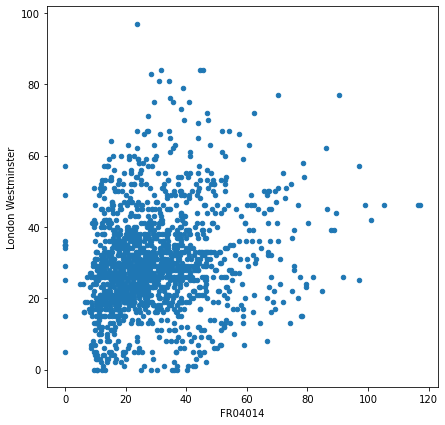

In [35]:
fig, ax = plt.subplots(figsize=(7,7))

no2_wide.plot.scatter(x='FR04014', y = 'London Westminster', ax=ax)

plt.show()

Look at the measurement of `no2` overtime for all locations.

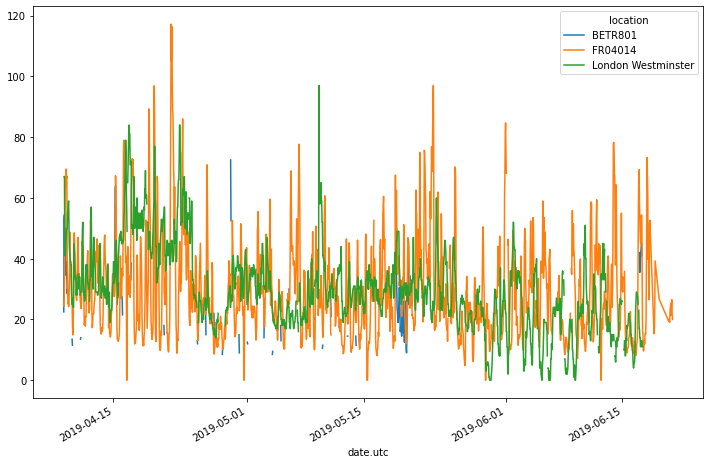

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))

no2_wide.plot(ax=ax)

plt.show()

### Melting - wide to long

In [38]:
no2_wide.reset_index(inplace=True)

In [39]:
no2_wide

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0
...,...,...,...,...
1700,2019-06-20 20:00:00+00:00,NaN,21.4,NaN
1701,2019-06-20 21:00:00+00:00,NaN,24.9,NaN
1702,2019-06-20 22:00:00+00:00,NaN,26.5,NaN
1703,2019-06-20 23:00:00+00:00,NaN,21.8,NaN


In [40]:
no2_wide.melt(id_vars='date.utc')

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5
...,...,...,...
5110,2019-06-20 20:00:00+00:00,London Westminster,NaN
5111,2019-06-20 21:00:00+00:00,London Westminster,NaN
5112,2019-06-20 22:00:00+00:00,London Westminster,NaN
5113,2019-06-20 23:00:00+00:00,London Westminster,NaN


In [41]:
no2_wide.melt( id_vars='date.utc', value_vars=['BETR801', 'FR04014', 'London Westminster'])

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5
...,...,...,...
5110,2019-06-20 20:00:00+00:00,London Westminster,NaN
5111,2019-06-20 21:00:00+00:00,London Westminster,NaN
5112,2019-06-20 22:00:00+00:00,London Westminster,NaN
5113,2019-06-20 23:00:00+00:00,London Westminster,NaN


How many rows per unique value of `location` in the re-melted data?

In [42]:
no2_wide.melt( id_vars='date.utc', value_vars=['BETR801', 'FR04014', 'London Westminster']).\
location.value_counts()

BETR801               1705
FR04014               1705
London Westminster    1705
Name: location, dtype: int64

In [43]:
no2.location.value_counts()

FR04014               1676
London Westminster    1608
BETR801                163
Name: location, dtype: int64

## Grouping and aggregating

Go back to the original `air` data.

In [44]:
air

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [45]:
air.parameter.value_counts()

no2     3447
pm25    1825
Name: parameter, dtype: int64

In [46]:
air.location.value_counts()

London Westminster    3256
FR04014               1676
BETR801                340
Name: location, dtype: int64

In [47]:
air.groupby(['parameter', 'location']).value.mean()

parameter  location          
no2        BETR801               26.950920
           FR04014               29.374284
           London Westminster    29.740050
pm25       BETR801               23.169492
           London Westminster    13.443568
Name: value, dtype: float64

In [48]:
air.groupby(['parameter', 'location']).mean()

value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568

In [49]:
air.groupby(['parameter', 'location']).describe()

value                                         \
                               count       mean        std  min   25%   50%   
parameter location                                                            
no2       BETR801              163.0  26.950920  13.604104  7.5  16.0  25.0   
          FR04014             1676.0  29.374284  16.044975  0.0  17.7  26.1   
          London Westminster  1608.0  29.740050  13.905749  0.0  21.0  28.0   
pm25      BETR801              177.0  23.169492  17.925337  3.0   9.0  18.5   
          London Westminster  1648.0  13.443568  10.062065  5.0   7.0   9.0   

                                            
                                75%    max  
parameter location                          
no2       BETR801             34.75   74.5  
          FR04014             37.20  117.2  
          London Westminster  36.00   97.0  
pm25      BETR801             34.00   99.0  
          London Westminster  14.00   55.0

In [52]:
air.groupby(['parameter', 'location']).mean().\
reset_index().\
pivot(index='location', columns='parameter', values='value')

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In [53]:
air.pivot_table( values='value', index='location', columns='parameter', 
                aggfunc='mean')

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In [54]:
air.pivot_table( values='value', index='location', columns='parameter', 
                aggfunc='mean',
                margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [57]:
air.pivot_table( values='value', index='location', columns='parameter', 
                aggfunc=np.min,
                margins=True)

parameter,no2,pm25,All
location,,,
BETR801,7.5,3.0,3.0
FR04014,0.0,NaN,0.0
London Westminster,0.0,5.0,0.0
All,0.0,3.0,0.0
